# EDA 과제 
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [2]:
df = pd.read_csv('airbnb_listings.csv', index_col=0)

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (25,26,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [3]:
# Q1
pd.set_option('display.max_columns', None)
df.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,Manhattan,40.85722,-73.93790,t,Other,Private room,2,NaN,1.0,2.0,Real Bed,"{Internet,Wifi}",NaN,100,NaN,NaN,NaN,1,$0.00,1,730,t,30,60,90,365,1,0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",NaN,225,"$1,995.00",NaN,$350.00,1,$0.00,7,1125,t,4,34,64,339,48,5,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,89,$575.00,"$2,100.00",$500.00,1,$0.00,1,730,t,6,10,13,151,313,69,90.0,9.0,9.0,10.0,10.0,10.0,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,200,NaN,NaN,$300.00,2,$100.00,3,21,t,0,0,0,0,78,8,90.0,10.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,t,Apartment,Private room,2,NaN,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",NaN,94,NaN,NaN,NaN,1,$13.00,1,730,t,30,60,90,109,75,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [4]:
# Q2
df1 = df.isnull().sum().to_frame()
df1.columns = ['missing_num']
df2 = (df.isnull().sum() / len(df)*100).round(1).to_frame()
df2.columns = ['missing_%']
idx = df1[df1['missing_num']==0].index
pd.concat([df1, df2], axis=1).sort_values('missing_num', ascending=False).drop(idx)

,missing_num,missing_%
jurisdiction_names,50781,100.0
license,50759,99.9
square_feet,50407,99.2
monthly_price,46119,90.8
weekly_price,45411,89.4
host_response_rate,19006,37.4
host_response_time,19006,37.4
security_deposit,17325,34.1
host_acceptance_rate,14015,27.6
review_scores_location,11482,22.6


- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

[Text(0, 0, 'jurisdiction_names'),
 Text(1, 0, 'license'),
 Text(2, 0, 'square_feet'),
 Text(3, 0, 'monthly_price'),
 Text(4, 0, 'weekly_price'),
 Text(5, 0, 'host_response_rate'),
 Text(6, 0, 'host_response_time'),
 Text(7, 0, 'security_deposit'),
 Text(8, 0, 'host_acceptance_rate'),
 Text(9, 0, 'review_scores_accuracy'),
 Text(10, 0, 'review_scores_value'),
 Text(11, 0, 'review_scores_location'),
 Text(12, 0, 'review_scores_communication'),
 Text(13, 0, 'review_scores_checkin'),
 Text(14, 0, 'review_scores_cleanliness'),
 Text(15, 0, 'review_scores_rating'),
 Text(16, 0, 'reviews_per_month'),
 Text(17, 0, 'beds'),
 Text(18, 0, 'bedrooms'),
 Text(19, 0, 'bathrooms'),
 Text(20, 0, 'host_is_superhost'),
 Text(21, 0, 'host_listings_count'),
 Text(22, 0, 'host_total_listings_count'),
 Text(23, 0, 'host_has_profile_pic'),
 Text(24, 0, 'host_identity_verified')]

<Figure size 1080x288 with 0 Axes>

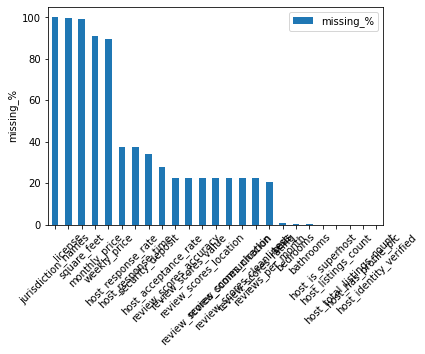

In [5]:
# Q3
plt.figure(figsize = (15,4))
ax = df2.sort_values('missing_%', ascending=False).drop(idx).plot(kind = 'bar')
ax.set_ylabel('missing_%')
ax.set_xticklabels (ax.get_xticklabels(), rotation=45)

- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다. 
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [6]:
# Q4
df[df['beds'].isnull()].head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,Manhattan,40.70850,-74.01795,t,Apartment,Private room,2,NaN,1.0,NaN,Real Bed,{},NaN,150,$500.00,"$1,600.00",NaN,1,$0.00,1,1125,t,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Manhattan,40.72152,-73.99279,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,1300,NaN,NaN,NaN,1,$0.00,1,1125,t,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,Brooklyn,40.70528,-73.95756,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,190,NaN,NaN,$0.00,1,$100.00,1,218,t,30,60,90,365,1,0,NaN,10.0,8.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.77799,-73.95223,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,80,$700.00,"$3,000.00",NaN,1,$0.00,1,60,t,0,0,0,0,1,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,Brooklyn,40.71099,-73.95217,t,Apartment,Private room,1,1.0,1.0,NaN,Real Bed,{},NaN,48,NaN,NaN,NaN,1,$0.00,5,30,t,0,0,0,0,1,0,80.0,6.0,6.0,10.0,10.0,10.0,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [7]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [8]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50791 non-null  object 
 2   host_listings_count               50791 non-null  float64
 3   host_total_listings_count         50791 non-null  float64
 4   host_verifications                50796 non-null  object 
 5   host_has_profile_pic              50791 non-null  object 
 6   host_identity_verified            50791 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다. 
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

<AxesSubplot:xlabel='room_type', ylabel='count'>

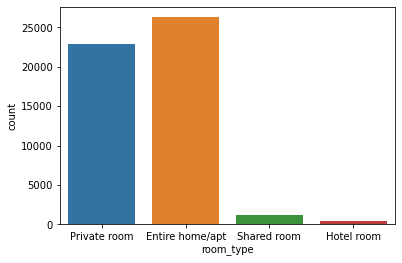

In [10]:
# Q5
sns.countplot(x = 'room_type', data = df)

- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

[Text(0.5, 0, ''), Text(0, 0.5, 'room_type')]

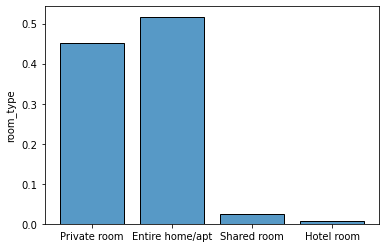

In [11]:
# Q6
ax = sns.histplot(x = 'room_type', data = df, stat = 'probability', shrink = 0.8)
ax.set(xlabel = '',ylabel='room_type')

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighborhood', ylabel='count'>

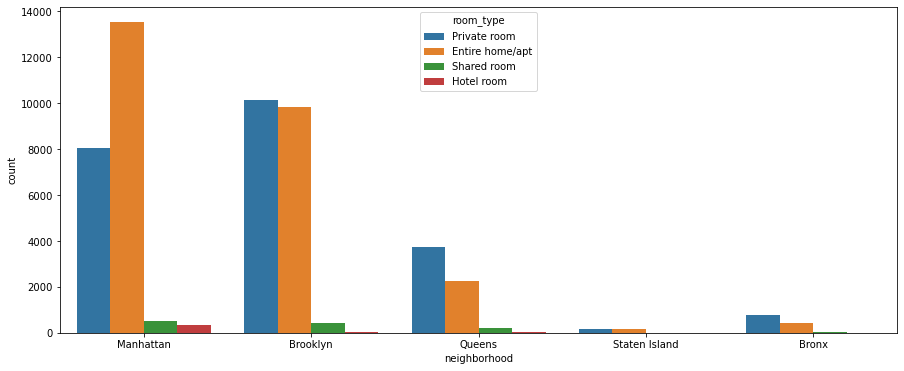

In [12]:
# Q7
plt.figure(figsize=(15,6))
sns.countplot('neighborhood', data = df, hue = 'room_type')

- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

<AxesSubplot:xlabel='neighborhood', ylabel='price'>

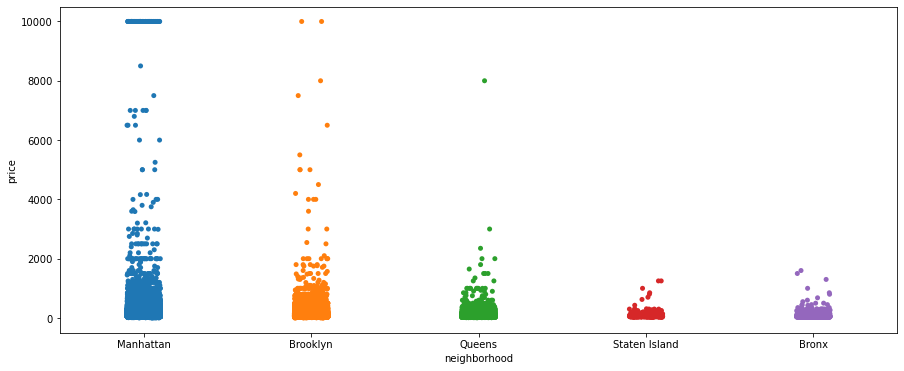

In [13]:
# Q8
# plt.figure() 여기부턴 직접 사이즈 조절해보세요
plt.figure(figsize=(15,6))
sns.stripplot(x = 'neighborhood', y = 'price', data = df)

- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

In [ ]:
# Q9
이용 가능한 공간이 많은 지역(Manhattan, Brooklyn)일수록 가격대가 높고 다양하게 나타난다.
Entire home/apt와 Private room에 대한 사람들의 수요가 높기 때문이라고 생각한다.


---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

(array([3.1006e+04, 5.5040e+03, 7.7540e+03, 2.0500e+03, 2.5020e+03,
        4.8500e+02, 7.5200e+02, 1.0700e+02, 2.5400e+02, 4.6000e+01,
        1.0800e+02, 2.0000e+01, 3.2000e+01, 1.7000e+01, 1.5600e+02,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 1.  ,  2.05,  3.1 ,  4.15,  5.2 ,  6.25,  7.3 ,  8.35,  9.4 ,
        10.45, 11.5 , 12.55, 13.6 , 14.65, 15.7 , 16.75, 17.8 , 18.85,
        19.9 , 20.95, 22.  ]),
 <BarContainer object of 20 artists>)

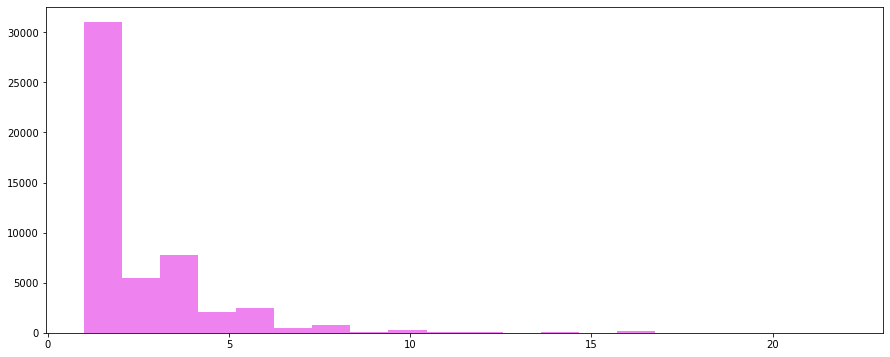

In [14]:
# Q10
plt.figure(figsize=(15,6))
plt.hist(df['accommodates'], bins = 20, color = 'violet')

- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

(0.0, 1000.0)

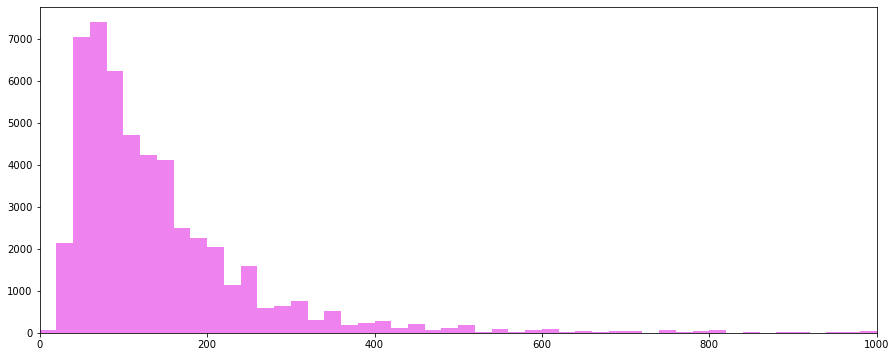

In [15]:
# Q11
plt.figure(figsize=(15,6))
plt.hist(df['price'], bins = 500, color = 'violet')
plt.xlim(0, 1000)

---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

시각화한 자료를 바탕으로 실제 특성들을 가공하는 방법에 대해서는 

<font color='orange'> 다음 시간인 FE 시간에 배우게 될 예정입니다.

다음 시간에 봐요!

---

* Q2 hint

<font color='white'> df의 null의 개수를 센 다음에, ".to_frame()" 을 써보세요. </font>

* Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>

